In [38]:
import pandas as pd
df = pd.read_csv('data_with_climate.csv')

In [2]:
data = pd.read_csv('Global_Landslide_Catalog_Export.csv')

In [7]:
df['country_name']=data['country_name']

In [39]:
df

,event_date,location_accuracy,landslide_category,landslide_trigger,landslide_size,landslide_setting,fatality_count,longitude,latitude,number,...,pressure_2018-10,humidity_2018-10,temp_2018-11,precipitation_2018-11,pressure_2018-11,humidity_2018-11,temp_2018-12,precipitation_2018-12,pressure_2018-12,humidity_2018-12
0,08/01/2008 12:00:00 AM,unknown,landslide,rain,large,mine,11.0,107.450000,32.562500,1,...,88.957419,6.750000,5.438667,1.798000,88.949667,5.028667,-0.391290,0.417097,89.127742,3.325161
1,01/02/2009 02:00:00 AM,5km,mudslide,downpour,small,unknown,0.0,-122.663000,45.420000,2,...,98.729032,6.146452,6.884667,4.669667,98.837000,5.536000,4.114839,7.680645,98.778065,4.810323
2,01/19/2007 12:00:00 AM,10km,landslide,downpour,large,unknown,10.0,-75.358700,-11.129500,3,...,69.922903,9.563226,12.405333,1.037000,69.838667,10.129333,12.077419,0.579032,69.935161,9.534839
3,07/31/2009 12:00:00 AM,unknown,landslide,monsoon,medium,unknown,1.0,81.708000,28.837800,4,...,77.580645,7.547097,8.304000,0.138667,77.578667,6.170000,4.719032,0.016129,77.441613,4.112581
4,10/16/2010 12:00:00 PM,5km,landslide,tropical_cyclone,medium,unknown,0.0,123.897800,10.333600,5,...,99.845484,18.834516,26.979667,5.005000,99.915000,19.129000,26.611935,7.609032,99.839032,19.195484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11028,04/01/2017 01:34:00 PM,5km,landslide,rain,medium,natural_slope,27.0,111.679944,-7.853409,11029,...,98.155806,15.057419,26.708000,6.150333,98.048667,17.320000,25.612258,9.322258,97.972258,18.060000
11029,03/25/2017 05:32:00 PM,5km,landslide,other,small,natural_slope,2.0,75.680611,33.403080,11030,...,71.856452,4.969677,1.662000,2.434000,71.799000,3.611000,-2.765484,0.947097,71.591935,2.272581
11030,12/15/2016 05:00:00 AM,1km,landslide,unknown,small,urban,1.0,91.772042,26.181606,11031,...,96.644516,14.654194,19.511667,0.383000,96.847000,11.645667,16.261290,0.662903,96.918387,9.475484
11031,04/29/2017 07:03:00 PM,1km,translational_slide,downpour,large,natural_slope,24.0,73.472379,40.886395,11032,...,78.719032,3.242581,-1.745000,0.461667,78.654000,2.818333,-3.590000,0.260000,78.477097,2.490968


In [47]:
# Список переменных для агрегации
variables = ['temp', 'precipitation', 'pressure', 'humidity']

# Создание словаря для хранения агрегированных данных
data_aggregated = {}

for variable in variables:
    # Собираем колонки для текущей переменной
    cols = [col for col in df.columns if variable in col]
    
    if not cols:
        print(f"Нет колонок для переменной: {variable}")
        continue
    
    # Извлекаем месяцы и годы из названий колонок
    months_years = [col.split('_')[1] for col in cols]
    
    # Создаем DataFrame для текущей переменной
    df_variable = df[cols]
    
    # Определяем месяцы (формат год-месяц)
    df_monthly = df_variable.copy()
    df_monthly.columns = months_years
    
    # Рассчитываем среднее значение по месяцам
    monthly_mean = df_monthly.groupby(df_monthly.columns, axis=1).mean()
    
    # Добавляем в словарь агрегированные данные
    data_aggregated[variable] = monthly_mean.mean(axis=0)

# Создаем новый DataFrame с агрегированными данными
df_new = pd.DataFrame(data_aggregated).reset_index()
df_new.columns = ['Month-Year'] + [f'{var}_mean' for var in variables]

In [48]:
df_new

,Month-Year,temp_mean,precipitation_mean,pressure_mean,humidity_mean
0,1998-01,10.128166,3.371867,92.293519,7.755544
1,1998-02,11.365295,3.386428,92.246101,7.935198
2,1998-03,13.022602,2.634984,92.349479,8.228411
3,1998-04,16.132562,2.499577,92.294277,9.258031
4,1998-05,18.587623,3.351571,92.240358,10.773206
...,...,...,...,...,...
247,2018-08,21.214352,4.983914,92.253630,13.142480
248,2018-09,19.450166,4.066842,92.375328,12.075036
249,2018-10,16.139703,3.255446,92.489596,10.264996
250,2018-11,12.954266,3.526246,92.494970,8.982757


In [3]:
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

# Initialize the geocoder
geolocator = Nominatim(user_agent="geoapiExercises")

def reverse_geocode(lat, lon):
    try:
        print(f"Geocoding coordinates: Latitude={lat}, Longitude={lon}")
        location = geolocator.reverse((lat, lon), language='en')
        country = location.raw['address'].get('country', None)
        print(f"Found country: {country}")
        return country
    except GeocoderTimedOut:
        print(f"Geocoding timed out for coordinates: Latitude={lat}, Longitude={lon}")
        return None



In [4]:
empty_country = data[data['country_name'].isna()]
empty_country

,source_name,source_link,event_id,event_date,event_time,event_title,event_description,location_description,location_accuracy,landslide_category,...,country_code,admin_division_name,admin_division_population,gazeteer_closest_point,gazeteer_distance,submitted_date,created_date,last_edited_date,longitude,latitude
13,Vietnamnet,http://english.vietnamnet.vn/fms/society/18126...,9958,07/03/2017 02:33:00 PM,NaN,Landslides block roads,Landslides after heavy storms block roads to X...,"Huyện Mèo Vạc, Hà Giang",10km,landslide,...,NaN,NaN,NaN,NaN,NaN,07/05/2017 02:33:00 PM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,105.529997,23.143830
42,WYMT,http://www.wymt.com/content/news/Community-pul...,9810,05/19/2017 08:14:00 PM,NaN,"Mudslide in Pikeville, KY",Mudslide floods first level of house,"Kentucky Ave, Pikeville, KY",1km,mudslide,...,NaN,NaN,NaN,NaN,NaN,06/20/2017 08:14:00 PM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-83.712126,36.770029
53,Vietnamnet,http://english.vietnamnet.vn/fms/society/18126...,9962,07/03/2017 02:33:00 PM,NaN,Landslide on road,Landslide (following heavy storms) linking Coc...,"Huyện Xín Mần, Hà Giang",25km,landslide,...,NaN,NaN,NaN,NaN,NaN,07/05/2017 02:33:00 PM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,104.453085,22.690403
73,Nation News,http://www.nationnews.com/nationnews/news/9742...,9763,06/02/2017 01:34:00 PM,NaN,Landslides in Oaxaca caused by Tropical Storm ...,Landslide in San Francisco Ozolotepec kills 2,"San Francisco Ozolotepec, Oaxaca",10km,landslide,...,NaN,NaN,NaN,NaN,NaN,06/16/2017 01:34:00 PM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-96.222559,16.098800
77,KMPH,http://kmph.com/news/local/yosemite-park-entra...,9744,01/06/2017 02:34:00 PM,NaN,Rockslide in Yosemite,"Boulders fall on entrance to Yosemite Park, bl...",Entrance to Yosemite Park on Highway 40,25km,rock_fall,...,NaN,NaN,NaN,NaN,NaN,06/16/2017 01:34:00 PM,11/20/2017 03:17:00 PM,02/15/2018 03:51:00 PM,-119.779508,37.676076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11028,The Jakarta Post,http://www.thejakartapost.com/news/2017/04/02/...,11109,04/01/2017 01:34:00 PM,NaN,Major landslide in Banaran,Landslide exacerbated by deforestation and bad...,"Banaran, Ponorogo, Jawa Timur, Indonesia",5km,landslide,...,NaN,NaN,NaN,NaN,NaN,07/28/2017 01:34:00 PM,12/19/2017 09:42:00 PM,02/15/2018 03:51:00 PM,111.679944,-7.853409
11029,Greater Kashmir,http://www.greaterkashmir.com/news/jammu/lands...,10845,03/25/2017 05:32:00 PM,NaN,Barnari Sigdi Landslide,Two teenage girls died after they were buried ...,"Barnari Sigdi area, Tehsil Mughalmaidan, Kisht...",5km,landslide,...,NaN,NaN,NaN,NaN,NaN,09/21/2017 05:32:00 PM,12/05/2017 06:45:00 PM,02/15/2018 03:51:00 PM,75.680611,33.403080
11030,NBC Daily,http://www.nbcdaily.com/separate-landslides-ki...,10973,12/15/2016 05:00:00 AM,NaN,Landslide at Pub Sarania Hill,An octogenarian was killed when a sudden lands...,"Pub Sarania Hill, Guwahati, Assam, India",1km,landslide,...,NaN,NaN,NaN,NaN,NaN,07/26/2017 01:22:00 PM,12/08/2017 08:37:00 PM,02/15/2018 03:51:00 PM,91.772042,26.181606
11031,AGU Landslide Blog,http://blogs.agu.org/landslideblog/2017/05/02/...,10901,04/29/2017 07:03:00 PM,NaN,Mayor landslide at Ayu village,Landslide triggered by heavy rainfall buried 1...,"Ayu, Ozgon, Osh, Kyrgyzstan",1km,translational_slide,...,NaN,NaN,NaN,NaN,NaN,07/14/2017 07:03:00 PM,12/07/2017 09:19:00 PM,02/15/2018 03:51:00 PM,73.472379,40.886395


In [5]:
# Apply reverse geocoding to get country names
empty_country['country'] = empty_country.apply(lambda row: reverse_geocode(row['latitude'], row['longitude']), axis=1)

Geocoding coordinates: Latitude=23.14383048, Longitude=105.5299971
Found country: Vietnam
Geocoding coordinates: Latitude=36.770029, Longitude=-83.712126
Found country: United States
Geocoding coordinates: Latitude=22.69040325, Longitude=104.4530851
Found country: Vietnam
Geocoding coordinates: Latitude=16.09880042, Longitude=-96.22255907
Found country: Mexico
Geocoding coordinates: Latitude=37.67607624, Longitude=-119.7795082
Found country: United States
Geocoding coordinates: Latitude=16.77787239, Longitude=120.9613282
Found country: Philippines
Geocoding coordinates: Latitude=27.83196401, Longitude=84.54704621
Found country: Nepal
Geocoding coordinates: Latitude=26.324724, Longitude=94.514651
Found country: India
Geocoding coordinates: Latitude=27.593, Longitude=88.492
Found country: India
Geocoding coordinates: Latitude=27.769034, Longitude=84.854632
Found country: Nepal
Geocoding coordinates: Latitude=21.61900923, Longitude=91.92597729
Found country: Bangladesh
Geocoding coordinat

Found country: India
Geocoding coordinates: Latitude=24.89456743, Longitude=121.7334279
Found country: Taiwan
Geocoding coordinates: Latitude=27.6835, Longitude=86.1804
Found country: Nepal
Geocoding coordinates: Latitude=17.1523721, Longitude=-100.6903727
Found country: Mexico
Geocoding coordinates: Latitude=40.48808507, Longitude=-111.650935
Found country: United States
Geocoding coordinates: Latitude=11.34165808, Longitude=76.8694278
Found country: India
Geocoding coordinates: Latitude=39.19779968, Longitude=71.27547914
Found country: Tajikistan
Geocoding coordinates: Latitude=22.65620215, Longitude=93.61589869
Found country: Myanmar
Geocoding coordinates: Latitude=41.83695379, Longitude=43.39854621
Found country: Georgia
Geocoding coordinates: Latitude=32.62803, Longitude=75.37123
Found country: India
Geocoding coordinates: Latitude=29.71492436, Longitude=98.92090376
Found country: China
Geocoding coordinates: Latitude=46.59738913, Longitude=-116.6803679
Found country: United State

Found country: Saint Lucia
Geocoding coordinates: Latitude=37.513392, Longitude=111.145575
Found country: China
Geocoding coordinates: Latitude=25.907233, Longitude=91.881892
Found country: India
Geocoding coordinates: Latitude=18.52049393, Longitude=-74.19608968
Found country: Haiti
Geocoding coordinates: Latitude=25.67061161, Longitude=94.11844319
Found country: India
Geocoding coordinates: Latitude=-23.91300145, Longitude=-65.46576609
Found country: Argentina
Geocoding coordinates: Latitude=15.12277305, Longitude=-91.89697611
Found country: Guatemala
Geocoding coordinates: Latitude=24.32420539, Longitude=93.15020652
Found country: India
Geocoding coordinates: Latitude=36.01490705, Longitude=-121.5287745
Found country: United States
Geocoding coordinates: Latitude=46.938003, Longitude=-112.122531
Found country: United States
Geocoding coordinates: Latitude=40.00611531, Longitude=-80.73380758
Found country: United States
Geocoding coordinates: Latitude=50.19859431, Longitude=-119.4860

Found country: Nepal
Geocoding coordinates: Latitude=45.5159, Longitude=-122.6993
Found country: United States
Geocoding coordinates: Latitude=27.10647226, Longitude=93.65975252
Found country: India
Geocoding coordinates: Latitude=14.52203442, Longitude=74.41035052
Found country: India
Geocoding coordinates: Latitude=22.039752, Longitude=103.993894
Found country: Vietnam
Geocoding coordinates: Latitude=27.08168565, Longitude=93.60815652
Found country: India
Geocoding coordinates: Latitude=33.18477201, Longitude=75.80813836
Found country: India
Geocoding coordinates: Latitude=30.922325, Longitude=78.681379
Found country: India
Geocoding coordinates: Latitude=33.08146902, Longitude=75.29750088
Found country: India
Geocoding coordinates: Latitude=44.32688636, Longitude=6.807628202
Found country: France
Geocoding coordinates: Latitude=6.190195, Longitude=100.331416
Found country: Malaysia
Geocoding coordinates: Latitude=43.09367409, Longitude=76.95661041
Found country: Kazakhstan
Geocoding

Found country: China
Geocoding coordinates: Latitude=28.6904, Longitude=99.2543
Found country: China
Geocoding coordinates: Latitude=53.11450322, Longitude=-1.638238361
Found country: United Kingdom
Geocoding coordinates: Latitude=29.88884727, Longitude=80.56522226
Found country: India
Geocoding coordinates: Latitude=41.74309277, Longitude=-70.61794177
Found country: United States
Geocoding coordinates: Latitude=20.5373, Longitude=-98.4812
Found country: Mexico
Geocoding coordinates: Latitude=36.71594657, Longitude=-83.60661439
Found country: United States
Geocoding coordinates: Latitude=27.758, Longitude=85.4197
Found country: Nepal
Geocoding coordinates: Latitude=-41.286411, Longitude=174.769403
Found country: New Zealand
Geocoding coordinates: Latitude=26.10973183, Longitude=91.80317334
Found country: India
Geocoding coordinates: Latitude=29.139, Longitude=81.623
Found country: Nepal
Geocoding coordinates: Latitude=39.28598942, Longitude=-77.54963507
Found country: United States
Geo

Found country: United States
Geocoding coordinates: Latitude=37.196704, Longitude=-122.154441
Found country: United States
Geocoding coordinates: Latitude=38.0526819, Longitude=-122.6865845
Found country: United States
Geocoding coordinates: Latitude=40.168849, Longitude=-79.851127
Found country: United States
Geocoding coordinates: Latitude=37.88206112, Longitude=-122.545533
Found country: United States
Geocoding coordinates: Latitude=39.29182137, Longitude=-121.0971565
Found country: United States
Geocoding coordinates: Latitude=39.32232446, Longitude=-120.42171
Found country: United States
Geocoding coordinates: Latitude=37.17394985, Longitude=-122.2348048
Found country: United States
Geocoding coordinates: Latitude=37.01683953, Longitude=-122.0627789
Found country: United States
Geocoding coordinates: Latitude=40.325565, Longitude=-80.60591
Found country: United States
Geocoding coordinates: Latitude=37.39499237, Longitude=-122.2573343
Found country: United States
Geocoding coordin


KeyboardInterrupt



In [32]:
empty_country['country_name']

13       NaN
42       NaN
53       NaN
73       NaN
77       NaN
        ... 
11028    NaN
11029    NaN
11030    NaN
11031    NaN
11032    NaN
Name: country_name, Length: 1562, dtype: object

In [36]:
from PIL import Image, ImageFilter
import os

# Путь к папке с изображениями
folder_path = r'C:\Users\ivan\WORK\ПАПАЙИ\Paper 4\(MDPI)  Paper 4 - landside\figs'

# Создаем новую папку для сохранения улучшенных изображений
output_folder_path = os.path.join(folder_path, 'figs_')
os.makedirs(output_folder_path, exist_ok=True)

def sharpen_image(image):
    # Применяем фильтр резкости
    return image.filter(ImageFilter.SHARPEN)

# Проходим по всем файлам в папке
for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):  # Поддерживаемые форматы
        file_path = os.path.join(folder_path, filename)
        
        # Открываем изображение
        with Image.open(file_path) as img:
            # Применяем улучшение резкости
            img = sharpen_image(img)
            
            # Устанавливаем DPI и сохраняем изображение в новую папку
            output_file_path = os.path.join(output_folder_path, filename)
            img.save(output_file_path, dpi=(1000, 1000))
            print(f'Sharpened and updated {filename} to 1000 DPI, saved to figs_')

print('Все изображения улучшены с помощью резкости, обновлены и сохранены в папку figs_.')


Sharpened and updated bandicam 2024-06-26 20-58-29-282.jpg to 1000 DPI, saved to figs_
Sharpened and updated bandicam 2024-06-26 20-58-48-119.jpg to 1000 DPI, saved to figs_
Sharpened and updated bandicam 2024-06-26 20-59-12-198.jpg to 1000 DPI, saved to figs_
Sharpened and updated bandicam 2024-06-26 20-59-47-732.jpg to 1000 DPI, saved to figs_
Sharpened and updated bandicam 2024-06-26 21-00-09-165.jpg to 1000 DPI, saved to figs_
Sharpened and updated bandicam 2024-06-26 21-00-16-516.jpg to 1000 DPI, saved to figs_
Sharpened and updated bandicam 2024-06-26 21-00-31-880.jpg to 1000 DPI, saved to figs_
Sharpened and updated bandicam 2024-06-26 21-00-56-524.jpg to 1000 DPI, saved to figs_
Sharpened and updated bandicam 2024-06-26 21-01-08-089.jpg to 1000 DPI, saved to figs_
Sharpened and updated bandicam 2024-06-26 21-01-22-435.jpg to 1000 DPI, saved to figs_
Sharpened and updated bandicam 2024-06-26 21-01-48-951.jpg to 1000 DPI, saved to figs_
Sharpened and updated bandicam 2024-06-26 2

In [25]:
data[data['country_name'].isna()]['country_name'] = empty_country['country']

KeyError: 'country'

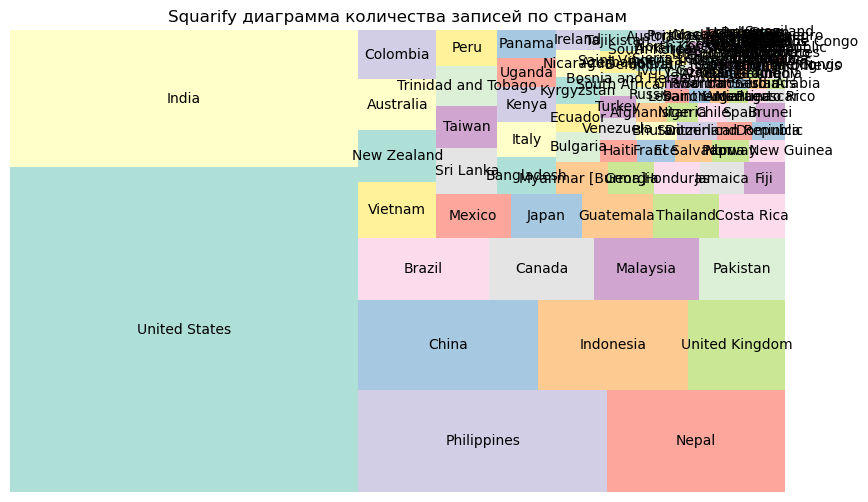

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify

country_counts = df['country_name'].value_counts()

# Подготовка данных для диаграммы
labels = country_counts.index
sizes = country_counts.values

# Настройка диаграммы
plt.figure(figsize=(10, 6))
squarify.plot(sizes=sizes, label=labels, alpha=.7, color=plt.get_cmap('Set3').colors)

# Настройка отображения
plt.axis('off')
plt.title('Squarify диаграмма количества записей по странам')
plt.show()



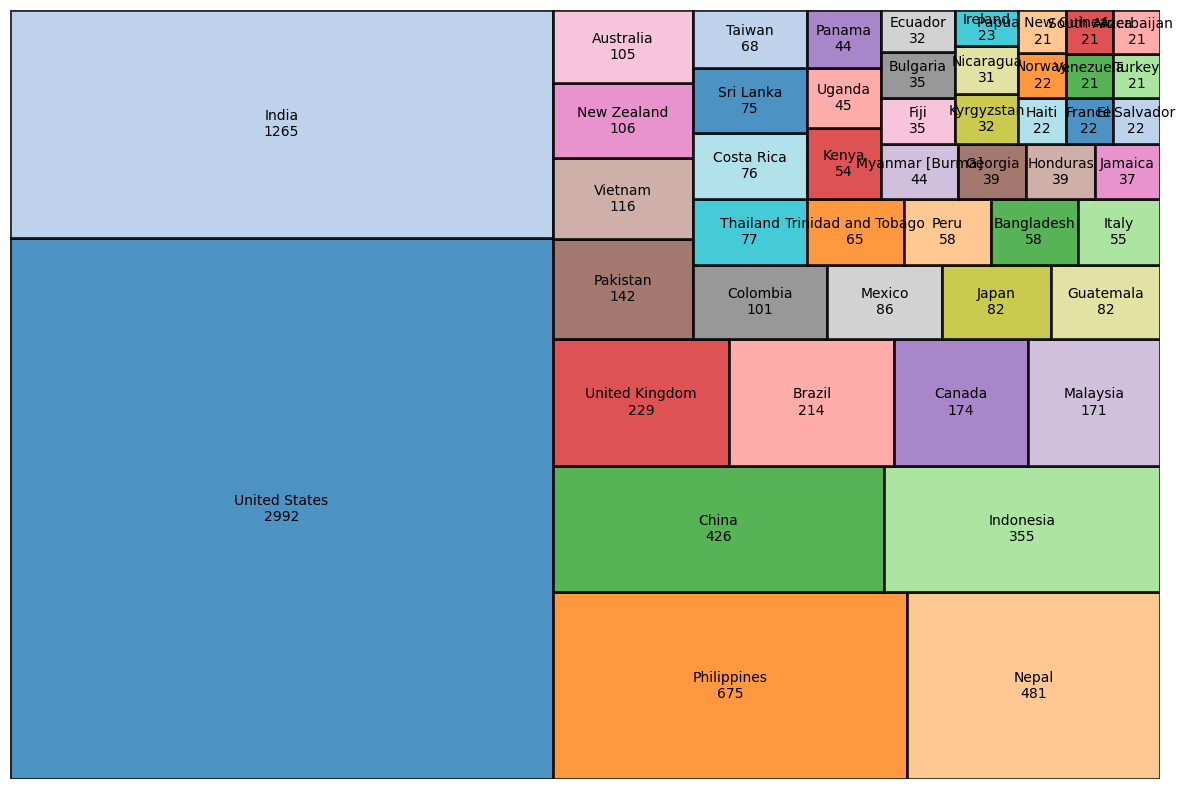

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify


df = pd.read_csv('Global_Landslide_Catalog_Export.csv')

# Подсчёт количества записей
country_counts = df['country_name'].value_counts()

# Фильтрация данных: только страны с количеством записей больше 20
filtered_counts = country_counts[country_counts > 20]

# Подготовка данных для диаграммы
labels = filtered_counts.index
sizes = filtered_counts.values

# Настройка диаграммы
plt.figure(figsize=(12, 8))
colors = plt.get_cmap('tab20').colors  # Используем палитру 'tab20' для более ярких цветов

# Создание диаграммы с границами
squarify.plot(sizes=sizes, label=[f'{label}\n{size}' for label, size in zip(labels, sizes)],
              alpha=.8, color=colors[:len(sizes)], edgecolor='black', linewidth=2)

# Настройка отображения
plt.axis('off')
#plt.title('Squarify диаграмма количества записей по странам (больше 20)')
plt.tight_layout()
plt.savefig('squares.pdf')

plt.show()


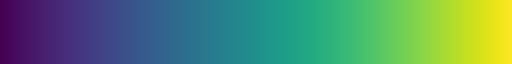

In [20]:
viridis_cmap 

In [34]:
country_counts[-100:-80]

El Salvador               22
Norway                    22
Papua New Guinea          21
Venezuela                 21
Turkey                    21
South Africa              21
Azerbaijan                21
Tajikistan                20
Bhutan                    20
Switzerland               19
Dominican Republic        17
Dominica                  16
Afghanistan               15
Nigeria                   15
Chile                     14
Spain                     14
Brunei                    14
Russia                    13
Bosnia and Herzegovina    12
Bolivia                   11
Name: country_name, dtype: int64